In [3]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform

from sklearn.impute import KNNImputer
import pickle
df_input = pd.read_csv("E:/CNSI_project/demo_and_data_5.0/aim1_dataset_v2.2.csv")

In [4]:
model_data_CNN = df_input.copy()
model_data_CNN = model_data_CNN.dropna(thresh=(model_data_CNN.shape[1]-1)*0.4, axis=0)
print(model_data_CNN.culture.value_counts())
model_data_CNN

0    8857
1     404
Name: culture, dtype: int64


,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,culture_old,C_LeukocyteCount,culture
0,NaN,NaN,0.7,92.0,NaN,NaN,NaN,3.7,144.0,11.7,...,NaN,100.0,NaN,0.0,NaN,NaN,NaN,0,1.00,0
1,NaN,3.6,0.6,95.0,NaN,NaN,187.0,3.7,137.0,12.6,...,NaN,43.0,2.0,17.0,NaN,NaN,NaN,0,3.76,0
2,NaN,2.6,1.2,76.0,NaN,NaN,NaN,4.9,137.0,9.7,...,NaN,41.0,49.0,10.0,16.0,13.0,2.0,0,10.00,0
3,NaN,NaN,0.8,105.0,NaN,NaN,NaN,3.9,142.0,15.3,...,NaN,62.0,NaN,0.0,NaN,NaN,NaN,0,1.00,0
4,NaN,4.9,1.0,111.0,12.0,2.0,NaN,4.6,128.0,8.4,...,45.3,96.0,NaN,1.0,19.0,9.0,3.0,0,142.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,NaN,NaN,0.8,155.0,NaN,NaN,NaN,3.6,137.0,11.6,...,NaN,0.0,NaN,100.0,NaN,NaN,NaN,0,18600.00,1
9257,NaN,NaN,0.7,140.0,NaN,NaN,180.0,3.7,140.0,13.0,...,NaN,1.0,NaN,90.0,NaN,NaN,NaN,0,7800.00,1
9258,NaN,2.3,0.7,53.0,NaN,NaN,NaN,3.8,135.0,10.7,...,NaN,88.0,NaN,8.0,NaN,NaN,NaN,0,3.00,0
9259,99.0,3.4,0.8,87.0,8.0,5.0,453.0,3.9,145.0,11.0,...,53.9,55.0,NaN,9.0,NaN,NaN,NaN,0,0.00,0


In [5]:
df_train, df_test = train_test_split(model_data_CNN, test_size=0.2, random_state = random_seed, stratify=model_data_CNN['culture_old'])

In [6]:
df_train = df_train.drop(columns=['culture_old'], axis=1)
df_test = df_test.drop(columns=['culture_old'], axis=1)
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
5692,NaN,NaN,1.0,101.0,NaN,NaN,NaN,4.0,139.0,14.9,...,NaN,NaN,84.0,NaN,0.0,NaN,NaN,NaN,2.00,0
4400,114.0,3.9,0.9,NaN,NaN,NaN,331.0,NaN,NaN,13.2,...,NaN,NaN,54.0,NaN,1.0,NaN,NaN,NaN,2.00,0
4345,85.0,3.8,0.5,104.0,NaN,NaN,NaN,3.3,140.0,9.6,...,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1.02,0
8376,NaN,4.6,1.0,98.0,40.0,0.0,NaN,4.7,140.0,13.3,...,0.3,41.4,63.0,NaN,3.0,NaN,NaN,NaN,2.00,0
3930,NaN,NaN,1.7,99.0,25.0,2.0,NaN,4.2,139.0,14.3,...,0.5,42.2,0.0,NaN,0.0,NaN,NaN,NaN,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,NaN,NaN,2.1,91.0,NaN,NaN,NaN,4.8,140.0,9.8,...,NaN,NaN,65.0,35.0,0.0,NaN,NaN,NaN,3.00,1
2017,170.0,4.1,1.3,96.0,NaN,NaN,277.0,3.4,145.0,10.6,...,NaN,NaN,39.0,NaN,50.0,NaN,NaN,NaN,3.00,0
1174,NaN,4.4,0.7,105.0,446.0,0.0,NaN,7.3,138.0,13.2,...,0.4,41.9,71.0,NaN,3.0,18.0,2.0,2.0,0.00,0
1435,NaN,NaN,0.6,113.0,9.0,1.0,NaN,3.7,137.0,14.5,...,NaN,43.5,91.0,3.0,0.0,16.0,2.0,2.0,115.00,0


In [7]:
# Null fill
columns1 = df_train.columns
index1 = df_train.index
columns2 = df_test.columns
index2 = df_test.index

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_train = imputer.fit_transform(df_train)
df_test = imputer.transform(df_test)

# Save the imputer as a pickle file for later recall.
with open("E:/CNSI_project/demo_and_data_5.0/Processed_data/StandardPickleFiles/imputer_KNNImputer_corrected_aim1_CNN.pickle","wb") as f:
    pickle.dump(imputer, f)

# change to DataFrame
df_train = pd.DataFrame(df_train, columns=columns1, index=index1)
df_train['culture'] = df_train['culture'].astype(np.int16)
df_test = pd.DataFrame(df_test, columns=columns2, index=index2)
df_test['culture'] = df_test['culture'].astype(np.int16)

df_train

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
8258,180.679727,2.800000,0.500000,179.000000,6.369960,0.803958,307.000000,3.500000,140.000000,10.1,...,0.746807,46.731750,38.368055,18.778440,16.577489,18.276368,8.155022,2.000000,0.779917,0
2666,183.000000,4.129704,0.800000,108.000000,12.091593,1.000000,294.200356,3.600000,144.000000,11.2,...,0.414854,52.000000,74.000000,12.381180,2.000000,14.000000,0.000000,2.000000,7.000000,1
6574,75.310965,3.200000,0.400000,86.000000,45.930304,0.836295,423.000000,3.600000,144.000000,12.8,...,0.524345,42.245003,83.000000,10.774733,0.000000,18.873872,4.084045,2.127287,0.000000,0
3328,101.844314,3.900000,0.800000,92.000000,6.579899,0.771424,384.000000,3.300000,133.000000,11.9,...,0.412331,47.104200,65.000000,22.919883,27.000000,22.399092,9.642842,2.171532,2.000000,0
1261,108.764054,3.663014,0.800000,100.000000,39.000000,1.000000,289.710715,4.200000,138.000000,13.1,...,0.300000,43.100000,59.000000,17.902500,0.000000,17.650544,6.995826,1.812317,4.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,87.979241,4.000000,0.671679,87.683271,27.732664,0.847035,182.070649,3.951724,140.421855,14.1,...,0.268040,41.300000,95.000000,6.325934,0.000000,16.627179,7.903323,2.194859,4.000000,0
7152,107.739254,4.320110,0.700000,93.000000,38.972557,0.600081,146.000000,3.400000,138.000000,11.6,...,0.368417,41.207492,88.000000,2.712270,0.000000,17.380846,7.192384,2.563123,2.000000,0
8396,118.000000,4.300000,1.200000,146.000000,25.771654,0.529439,197.000000,4.200000,137.000000,14.4,...,0.743294,48.558970,41.000000,40.009983,0.000000,17.591842,6.192963,1.943935,0.000000,0
1945,99.111777,3.383325,0.500000,121.000000,9.701082,0.818160,285.123133,4.900000,139.000000,12.2,...,0.666495,48.602720,10.000000,50.000000,40.000000,18.484256,6.897568,2.198375,2.000000,0


In [8]:
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
5692,90.256438,4.483090,1.0,101.000000,36.087948,1.038375,217.146273,4.000000,139.000000,14.9,...,0.365403,42.694337,84.0,12.458115,0.0,16.328176,3.629778,2.376342,2.00,0
4400,114.000000,3.900000,0.9,104.561944,29.286370,0.593057,331.000000,4.390454,134.373435,13.2,...,0.396669,43.468761,54.0,27.800734,1.0,16.784284,3.500891,2.127469,2.00,0
4345,85.000000,3.800000,0.5,104.000000,5.941085,0.793577,252.707212,3.300000,140.000000,9.6,...,0.515204,46.693517,68.0,10.985871,1.0,17.052021,4.387167,2.152072,1.02,0
8376,155.499937,4.600000,1.0,98.000000,40.000000,0.000000,180.538310,4.700000,140.000000,13.3,...,0.300000,41.400000,63.0,22.057429,3.0,16.617252,5.272512,2.437955,2.00,0
3930,106.758521,3.929068,1.7,99.000000,25.000000,2.000000,275.533561,4.200000,139.000000,14.3,...,0.500000,42.200000,0.0,50.882473,0.0,17.197944,3.253884,2.378327,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,103.316807,3.974217,2.1,91.000000,35.549499,0.622295,321.634745,4.800000,140.000000,9.8,...,0.218486,47.798898,65.0,35.000000,0.0,18.622472,5.836997,2.475312,3.00,1
2017,170.000000,4.100000,1.3,96.000000,12.321528,0.800781,277.000000,3.400000,145.000000,10.6,...,0.418946,43.745447,39.0,11.673293,50.0,16.874645,5.334488,2.478838,3.00,0
1174,185.228003,4.400000,0.7,105.000000,446.000000,0.000000,209.369064,7.300000,138.000000,13.2,...,0.400000,41.900000,71.0,13.488015,3.0,18.000000,2.000000,2.000000,0.00,0
1435,109.160057,3.881042,0.6,113.000000,9.000000,1.000000,307.864295,3.700000,137.000000,14.5,...,0.398816,43.500000,91.0,3.000000,0.0,16.000000,2.000000,2.000000,115.00,0


In [9]:
df_train.culture.value_counts()

0    7094
1     314
Name: culture, dtype: int64

In [10]:
df_test.culture.value_counts()

0    1763
1      90
Name: culture, dtype: int64

In [11]:
from sklearn.utils import class_weight
def calc_class_weight(total_y):
    my_class_weight = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(total_y), y=total_y)
    return my_class_weight

In [12]:
my_class_weight = calc_class_weight(model_data_CNN['culture'].values.tolist())
my_class_weight

array([ 0.52280682, 11.46163366])

In [13]:
my_class_weight = {0:my_class_weight[0], 1:my_class_weight[1]}
my_class_weight

{0: 0.5228068194648301, 1: 11.461633663366337}

In [14]:
# my_class_weight = {0:1, 1:1}
# my_class_weight

In [15]:
# generate X subsets for Modelling 
X_train = df_train.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
print(X_train.shape, X_test.shape)

(7408, 27) (1853, 27)


In [16]:
# generate Y subsets for Modelling 
y_train = df_train.iloc[:,-1:]
y_test = df_test.iloc[:,-1:]
y_train.shape, y_test.shape

((7408, 1), (1853, 1))

In [17]:
# method 1
# MinMaxScaler normalization

# scaler = MinMaxScaler()
# X_train= scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# print(X_train.shape, X_test.shape)
# X_train[:2]

In [18]:
# method 2
# StandardScaler normalization

# Data normalisation leads to less volatility during training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Save the scaler as a pickle file for later recall.
with open("E:/CNSI_project/demo_and_data_5.0/Processed_data/StandardPickleFiles/StandardScaler_corrected_aim1_CNN.pickle","wb") as f:
    pickle.dump(scaler, f)

X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)
X_train[:2]

(7408, 27) (1853, 27)


array([[ 0.94755504, -2.12218874, -0.5279807 ,  1.19881081, -0.40709923,
        -0.03587621, -0.00316684, -0.96578474,  0.24898612, -0.72771134,
        -0.87495098, -1.65286812, -0.90572259, -1.09218254,  0.19842402,
         2.18709418, -0.15571233, -0.64948463,  0.19659225, -0.03817131,
        -0.64174758,  0.35282374, -0.00611728,  0.36282619,  1.12426082,
        -0.34428511, -0.05193165],
       [ 0.98997232,  0.6624221 , -0.22537231, -0.28808714, -0.28984255,
         0.30644872, -0.05214234, -0.78434062,  1.19169371, -0.2407973 ,
         0.00450438, -0.63683272, -0.20416051, -0.48488522, -0.21209485,
        -0.11439947, -0.08717079,  0.37925152, -0.59635798,  0.77691738,
         0.50173856, -0.13509602, -0.53553198, -1.9545342 , -1.65384531,
        -0.34428511, -0.04963698]])

In [19]:
# CNN
# K-fold verification
# develip Neural Network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten,AveragePooling1D, MaxPooling1D
n_cols = X_train.shape[1]
# kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)
def build_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(n_cols, 1)))
    model.add(MaxPooling1D(pool_size=3))
#     model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
#     model.add(AveragePooling1D(pool_size=2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    # model.summary()
    model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
    return model

In [1012]:
num_epochs = 100
k = 4
num_val_samples = X_train.shape[0] // k
all_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = y_train[i*num_val_samples : (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([X_train[:i * num_val_samples], X_train[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets),
                       epochs = num_epochs, batch_size = 64, verbose = 0, class_weight=my_class_weight)
    all_histories.append(history.history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [1013]:
average_loss = [np.mean([x['loss'][i] for x in all_histories]) for i in range(num_epochs)]
average_accuracy = [np.mean([x['accuracy'][i] for x in all_histories]) for i in range(num_epochs)]

average_val_loss = [np.mean([x['val_loss'][i] for x in all_histories]) for i in range(num_epochs)]
average_val_accuracy = [np.mean([x['val_accuracy'][i] for x in all_histories]) for i in range(num_epochs)]

In [1014]:
gap = 1
n = int(num_epochs/gap)

loss_gap10 = [np.average(average_loss[gap*i:gap*(i+1)]) for i in range(n)]
acc_gap10 = [np.average(average_accuracy[gap*i:gap*(i+1)]) for i in range(n)]

val_loss_gap10 = [np.average(average_val_loss[gap*i:gap*(i+1)]) for i in range(n)]
val_acc_gap10 = [np.average(average_val_accuracy[gap*i:gap*(i+1)]) for i in range(n)]

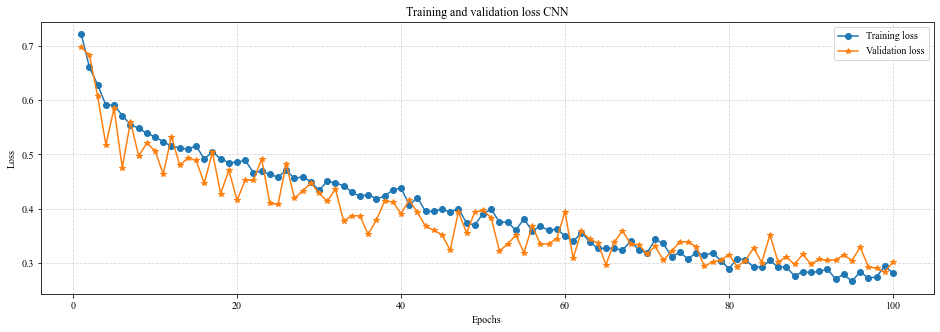

In [1015]:
epochs = [each*gap for each in range(1, 1+n)]

plt.figure(figsize = (16,5))
plt.clf() 
plt.plot(epochs, loss_gap10, 'o-', label='Training loss')
plt.plot(epochs, val_loss_gap10, '*-', label='Validation loss')
plt.title('Training and validation loss CNN')
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

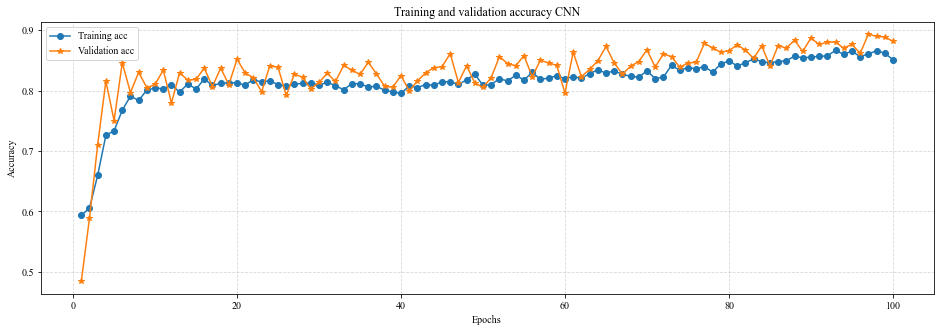

In [1016]:
plt.figure(figsize = (16,5))
# plt.grid(axis="y")
plt.plot(epochs, acc_gap10, 'o-', label='Training acc')
plt.plot(epochs, val_acc_gap10, '*-', label='Validation acc')
plt.title('Training and validation accuracy CNN')
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [1377]:
model = build_model()
model.fit(X_train, y_train, epochs = 20, batch_size = 64, verbose = 1, class_weight=my_class_weight)

Epoch 1/20
116/116 [==============================] - 1s 8ms/step - loss: 0.7139 - accuracy: 0.5795
Epoch 2/20
116/116 [==============================] - 1s 5ms/step - loss: 0.6595 - accuracy: 0.6149
Epoch 3/20
116/116 [==============================] - 1s 5ms/step - loss: 0.6177 - accuracy: 0.7045
Epoch 4/20
116/116 [==============================] - 1s 5ms/step - loss: 0.5878 - accuracy: 0.7636
Epoch 5/20
116/116 [==============================] - 1s 5ms/step - loss: 0.5635 - accuracy: 0.7879
Epoch 6/20
116/116 [==============================] - 1s 5ms/step - loss: 0.5528 - accuracy: 0.7962
Epoch 7/20
116/116 [==============================] - 1s 5ms/step - loss: 0.5322 - accuracy: 0.8067
Epoch 8/20
116/116 [==============================] - 1s 5ms/step - loss: 0.5437 - accuracy: 0.8017
Epoch 9/20
116/116 [==============================] - 1s 5ms/step - loss: 0.5179 - accuracy: 0.7962
Epoch 10/20
116/116 [==============================] - 1s 5ms/step - loss: 0.5337 - accuracy: 0.8025

In [20]:
# save model
# model.save()

In [20]:
# load model
from tensorflow.keras.models import load_model
model = load_model()

# CNN Evaluation

In [21]:
model.evaluate(X_test, y_test)

58/58 [==============================] - 3s 2ms/step - loss: 0.4602 - accuracy: 0.8554


[0.4601645767688751, 0.8553696870803833]

In [22]:
y_predict = model.predict(X_test)
y_predict

58/58 [==============================] - 0s 1ms/step


array([[0.83376217, 0.16623785],
       [0.7062372 , 0.29376283],
       [0.7659257 , 0.2340743 ],
       ...,
       [0.5337885 , 0.46621147],
       [0.80607486, 0.19392511],
       [0.7021765 , 0.2978235 ]], dtype=float32)

In [23]:
y_test

,culture
5692,0
4400,0
4345,0
8376,0
3930,0
...,...
2741,1
2017,0
1174,0
1435,0


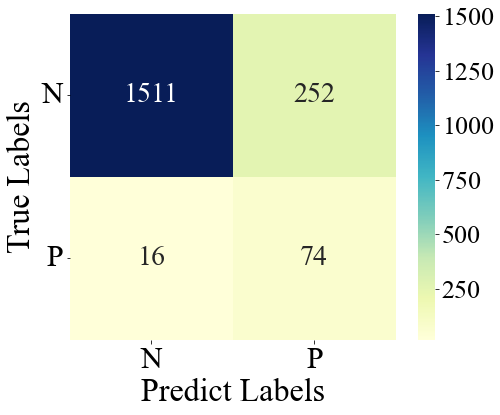

In [24]:
# generate confusion matrix
labels1 = ["N", "P"]
plt.figure(figsize = (8, 6))
cm = confusion_matrix(y_test.values,y_predict.argmax(axis=1))
ax = sns.heatmap(cm, square=True, annot=True , cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".0f")   #square=True, annot=True showing number
# plt.matshow(cm)
# plt.title('Confusion matrix CNN', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

# plt.colorbar()
plt.xticks([i + 0.5 for i in range(len(labels1))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(labels1))], labels1, rotation = 0, fontsize=30)

plt.show()

In [25]:
cm

array([[1511,  252],
       [  16,   74]], dtype=int64)

In [26]:
predict_matrix = np.zeros(cm.shape)
for i in range(cm.shape[0]):
    temp = np.sum(cm[i])
    for j in range(cm.shape[1]):
        predict_matrix[i,j] = cm[i,j]/temp
predict_matrix

array([[0.85706183, 0.14293817],
       [0.17777778, 0.82222222]])

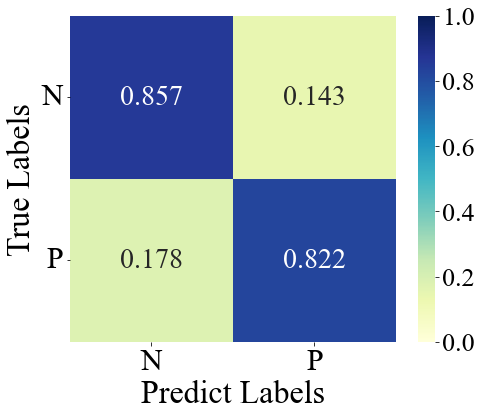

In [27]:
plt.figure(figsize = (8, 6))
ax = sns.heatmap(predict_matrix, square=True, annot=True ,cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".3f", vmin=0, vmax=1)
plt.xticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

# plt.title('Confusion matrix of prediction', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)
plt.show()

In [28]:
# calculate evaluation metric using test cohort
accuracy0 = np.round(accuracy_score(y_test.values, 
               y_predict.argmax(axis=1)), decimals = 3)
print('\nCNN Predictive Accuracy: ',accuracy0)


CNN Predictive Accuracy:  0.855


In [29]:
print('\nSummary of CNN Precision and Recall\n') 
print(classification_report(y_test, y_predict.argmax(axis=1), 
                            target_names = labels1, digits=3))


Summary of CNN Precision and Recall

              precision    recall  f1-score   support

           N      0.990     0.857     0.919      1763
           P      0.227     0.822     0.356        90

    accuracy                          0.855      1853
   macro avg      0.608     0.840     0.637      1853
weighted avg      0.952     0.855     0.891      1853



In [30]:
from sklearn.metrics import confusion_matrix

y_true = np.array(y_test).flatten()
y_true = y_true.astype(int)
y_pred = y_predict.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

# The weights for each class
weights = np.bincount(y_true) / len(y_true)

# Weighted average sensitivity and specificity
weighted_avg_sensitivity = np.sum(weights * np.array([TPR, TNR]))
weighted_avg_specificity = np.sum(weights * np.array([TNR, TPR]))

print('Weighted avg sensitivity:', weighted_avg_sensitivity)
print('Weighted avg specificity:', weighted_avg_specificity)

Weighted avg sensitivity: 0.8239143778503386
Weighted avg specificity: 0.8553696708041014


In [31]:
from sklearn.metrics import confusion_matrix

y_true = np.array(y_test).flatten()
y_true = y_true.astype(int)
y_pred = y_predict.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
sensitivity = TP/(TP+FN)
# Specificity or true negative rate
specificity = TN/(TN+FP) 

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 0.8222222222222222
specificity: 0.8570618264322178


In [32]:
y_predict

array([[0.83376217, 0.16623785],
       [0.7062372 , 0.29376283],
       [0.7659257 , 0.2340743 ],
       ...,
       [0.5337885 , 0.46621147],
       [0.80607486, 0.19392511],
       [0.7021765 , 0.2978235 ]], dtype=float32)

In [33]:
y_test

,culture
5692,0
4400,0
4345,0
8376,0
3930,0
...,...
2741,1
2017,0
1174,0
1435,0


In [34]:
y_predict.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

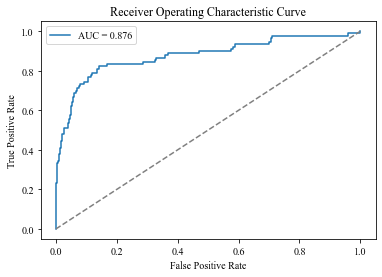

In [35]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc,roc_auc_score

# fpr, tpr, thresholds = roc_curve(label_true.ravel(), label_predict.ravel())
# auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test, y_predict[:,1])
auc = roc_auc_score(y_test, y_predict[:,1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [39]:
y_test

,culture
5692,0
4400,0
4345,0
8376,0
3930,0
...,...
2741,1
2017,0
1174,0
1435,0


# AUPRC、C-index and Brier Score

FCN AUPRC: 0.522
Baseline (positive class ratio): 0.049


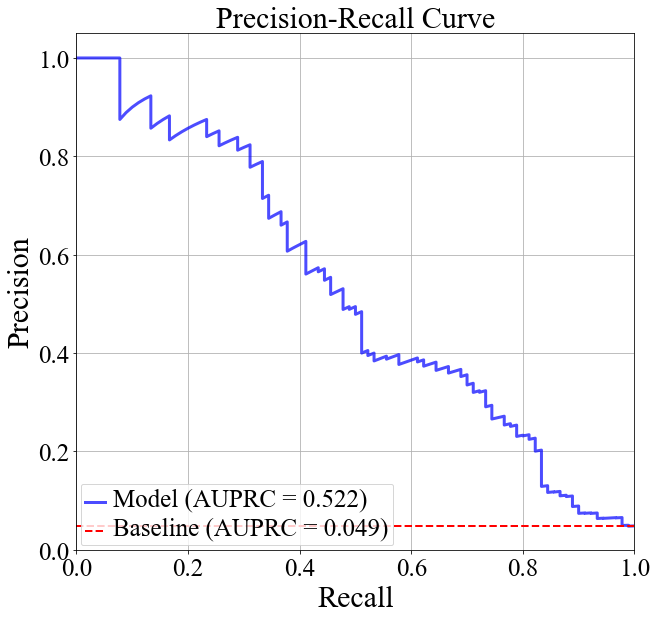

In [40]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, brier_score_loss
from lifelines.utils import concordance_index

# AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_predict[:,1])
auprc = auc(recall, precision)
print(f'FCN AUPRC: {auprc:.3f}')

baseline = y_test.culture.value_counts()[1] / len(y_test)
print(f'Baseline (positive class ratio): {baseline:.3f}')

plt.figure(figsize=(10, 9.5))
plt.plot(recall, precision, color='blue', label=f'Model (AUPRC = {auprc:.3f})', linewidth=3, alpha=0.7)

plt.axhline(y=baseline, color='red', linestyle='--', label=f'Baseline (AUPRC = {baseline:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=30, fontname='Times New Roman') 
plt.ylabel('Precision', fontsize=30, fontname='Times New Roman')
plt.title('Precision-Recall Curve', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower left')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(25)

plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=25, fontname='Times New Roman')
plt.yticks(fontsize=25, fontname='Times New Roman')

plt.show()

In [37]:
# C-index
# C-index is commonly used for survival analysis, but can also be used for classification tasks to measure the consistency of the model for survival or event ordering.
# For binary classification tasks, you can simply use the concordance_index function in lifelines.utils.
c_index = concordance_index(y_test, y_predict[:,1])
print(f'FCN C-index: {c_index:.3f}')

FCN C-index: 0.876


In [38]:
# Brier Score 
# Measures the mean square error between the model's predicted probability and the actual outcome.
brier_score = brier_score_loss(y_test, y_predict[:,1])
print(f'FCN Brier Score: {brier_score:.3f}')

FCN Brier Score: 0.140
